# TSA - Assignment 2: ARMA Processes and Seasonal Processes

### 1. Stability

Let the process {Xt} be an AR(2) given by:

$$X_t + ϕ_1 X_{t−1} + ϕ_2 X_{t−2} = ϵ_t$$

where $\set{ϵ_t}$ is a white noise process with $σ_ε = 1$.

##### 1.1. Determine if the process is stationary for $ϕ_1 = −0.7$ and $ϕ_2 = −0.2$ by analysing the roots of the characteristic equation.


**Solution:**

Basically follow the rules on page 12 from lecture5. For the auto-regression AR(p=2) model for a stochastic process represented by random variable $X$, it is always invertible and is considered to be stationary, if its distribution does not change over time.
That is the case, if all roots of $\Phi(z^{-1})$ lie in the unit circle.

WTF is the characteristic equation?
    - Idea: produce the AR in matrix form
    - take X as the Operator
    - deduce the characteristic polynomial (Spectral & Eigenvalue)
    - determine roots/eigenvalues of that polynomial

- otherwise: https://en.wikipedia.org/wiki/Autoregressive_model under spectrum
- set B = z^-1 and multiply all by z^2

##### 1.2. Is the process invertible?


##### 1.3. Write the autocorrelation ρ(k) for the AR(2) process as function of $ϕ_1$ and $ϕ_2$.


##### 1.4. Plot the autocorrelation $ρ(k)$ up to $n_{\text{lag}} = 30$ for the coefficient values above.

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pathlib import Path

sns.set_theme(style="whitegrid", rc={"figure.figsize": (10, 8)})

DPI_EXPORT = 600
ASSIGNMENT_DIR = Path().resolve()
OUTPUT_DIR = ASSIGNMENT_DIR / "img" / "out_" 

_________

### 2. Simulating seasonal processes 

A process $\set{Y_t}$ is said to follow a multiplicative $(p, d, q) × (P, D, Q)_s$ seasonal model if

$$ϕ(B) Φ(B_s) ∇^d ∇^D_s Y_t = θ(B) \Theta(B^s) ϵ_t$$

where $\set{ϵ_t}$ is a white noise process, and $ϕ(B)$ and $θ(B)$ are polynomials (in $B$) of order $p$ and $q$, respectively.

Furthermore, $\Psi(B^s)$ and $\Theta(B^s)$ are polynomials in $B^s$. All according to Definition 5.22 in the textbook.

*Note:* In R ```arima.sim``` does not have a seasonal module, so model formulations as standard ARIMA processes have to be made when using that function.
Simulate the following models. Plot the simulations and the associated autocorrelation functions (ACF and PACF). Comment on each result:

**Explanation**:

It's best to explain the role of some variables in the model:

$$\begin{align*}
s &\to \text{seasonal shift} && \text{convolution onto AR, MA, ARMA} \\
p &\to \text{lag of time-series} && \text{for AR, polynomial order}  \\
& && \phi(B) Y_t = Y_t (1 + \phi_1 B + \phi_2 B^2 ... \phi_p B^p) = \varepsilon_t \\
q &\to \text{lag of random noise} && \text{for MA, polynomial order}  \\
& && \theta(B) \varepsilon_t = \varepsilon_t (1 + \theta_1 B + \theta_2 B^2 ... \theta_p B^p) = Y_t \\
\phi &\to \text{AR}(p) && \text{coeff. for the auto-regressive part} \\
\Phi &\to \text{AR}(P) && \text{coeff. for the seasonal auto-regressive part} \\
\theta &\to \text{MA}(q) && \text{coeff. for the moving-average part} \\
\Theta &\to \text{AR}(P) && \text{coeff. for the seasonal moving-average part} \\
& && \text{that's why shift } B^s \\
\nabla^d &\to \nabla^d Y_t = Y_t - Y_{t+d} && \text{difference shift of normal model} \\
\nabla^D_s &\to \nabla^D_s Y_{t} = Y_{t+s} - Y_{t+s+d} && \text{difference shift of seasonal model} \\
\end{align*}$$

##### 2.1. $A (1, 0, 0) × (0, 0, 0)_{12}$ model with the parameter $ϕ_1 = 0.6$
##### 2.2. $A (0, 0, 0) × (1, 0, 0)_{12}$ model with the parameter $\Phi_1 = -0.9$
##### 2.3. $A (1, 0, 0) × (0, 0, 1)_{12}$ model with the parameter $\phi_1 = 0.9$ and $\Theta_1 = -0.7$
##### 2.4. $A (1, 0, 0) × (1, 0, 0)_{12}$ model with the parameter $\phi_1 = -0.6$ and $\Phi_1 = -0.8$
##### 2.5. $A (0, 0, 1) × (0, 0, 1)_{12}$ model with the parameter $\theta_1 = 0.4$ and $\Theta_1 = -0.8$
##### 2.5. $A (0, 0, 1) × (1, 0, 0)_{12}$ model with the parameter $\theta_1 = -0.4$ and $\Phi_1 = 0.7$

In [40]:
# figure out model params ordering for simulation
SARIMAX([], order=(2,1,1), seasonal_order=(1,1,2,12)).param_names

['ar.L1', 'ar.L2', 'ma.L1', 'ar.S.L12', 'ma.S.L12', 'ma.S.L24', 'sigma2']

In [138]:
from typing import Tuple, List
import numpy as np

# model params ((p,d,q), (P,D,Q,s))
def plot_model(model_params:Tuple[Tuple[int, int, int], Tuple[int, int, int, int]], phis:List[float]=[], thetas:List[float]=[], Phis:List[float]=[], Thetas:List[float]=[], exog:List[float]=None, rand_eps_init:bool=False):
    sigma2_init = 1     # initialze the variance of the stochastic variable eps
    n = 1000            # number of points to simulate
    eps = np.random.normal(0, sigma2_init, n)

    # create the basic model
    model = SARIMAX([], order=model_params[0], seasonal_order=model_params[1])
    if rand_eps_init:
        model = SARIMAX(eps, order=model_params[0], seasonal_order=model_params[1])

    # set the coefficients for simulation
    data, params = [], []
    if phis or Phis or thetas or Thetas:
        params.extend(phis)
        params.extend(thetas)
        params.extend(Phis)
        params.extend(Thetas)
        params.append(sigma2_init)
        data = model.simulate(params, n) #measurement_shocks=eps)

    # get the model params
    p,d,q = model_params[0][0], model_params[0][1], model_params[0][2]
    P,D,Q,s = model_params[1][0], model_params[1][1], model_params[1][2], model_params[1][3]
    
    phi_str, Phi_str, theta_str, Theta_str = [],[],[],[]
    if p!=0:
        phi_str = [f'$ϕ_{i}={phis[i-1]}$' for i in range(1,p+1)]
    if P!=0:
        print('here', P)
        Phi_str = [f'$Φ_{i}={Phis[i-1]}$' for i in range(1,P+1)] 
    if q!=0:
        theta_str = [f'$θ_{i}={thetas[i-1]}$' for i in range(1,q+1)]
    if Q!=0:
        Theta_str = [f'$Θ_{i}={Thetas[i-1]}$' for i in range(1,Q+1)]
    params_str = ",".join(phi_str+Phi_str+theta_str+Theta_str)

    title = ''
    title = f'AR({p})' if p!=0 else title
    title = f'MA({q})' if q!=0 else title
    title = f'ARMA({p},{q})' if p!=0 and q!=0 else title
    sub_title = f'$(p,d,q) = ({p},{d},{d}) \\quad (P,D,Q)_s = ({P},{D},{Q})_{s} \\quad$ {params_str}'

    # plot the data
    fig = plt.figure(dpi=DPI_EXPORT, facecolor='white')
    fig.suptitle(f'Simulated {title} Model \n {sub_title}')

    ax1 = plt.subplot2grid(shape=(2,2), loc=(0,0), rowspan=1, colspan=2)
    ax1.set_ylabel('Time-Series - $Y_t$')
    ax1.set_xlabel('Timestep - $t$')
    ax1.plot(data)

    ax2 = plt.subplot2grid(shape=(2,2), loc=(1,0), rowspan=1, colspan=1)
    ax2.set_ylabel('ACF(k; $Y_t$)')
    ax2.set_xlabel('lag, $k$')
    ax2.set_yticks(np.linspace(-1.2, 1.2, 9))
    ax2.set_ylim(-1.2, 1.2)
    plot_acf(data, ax2)

    ax3 = plt.subplot2grid(shape=(2,2), loc=(1,1), rowspan=1, colspan=1)
    ax3.set_ylabel('PACF(k; $Y_t$)')
    ax3.set_xlabel('lag, $k$')
    ax3.set_yticks(np.linspace(-1.2, 1.2, 9))
    ax3.set_ylim(-1.2, 1.2)
    plot_pacf(data, ax3)

    plt.tight_layout(pad=0.8)


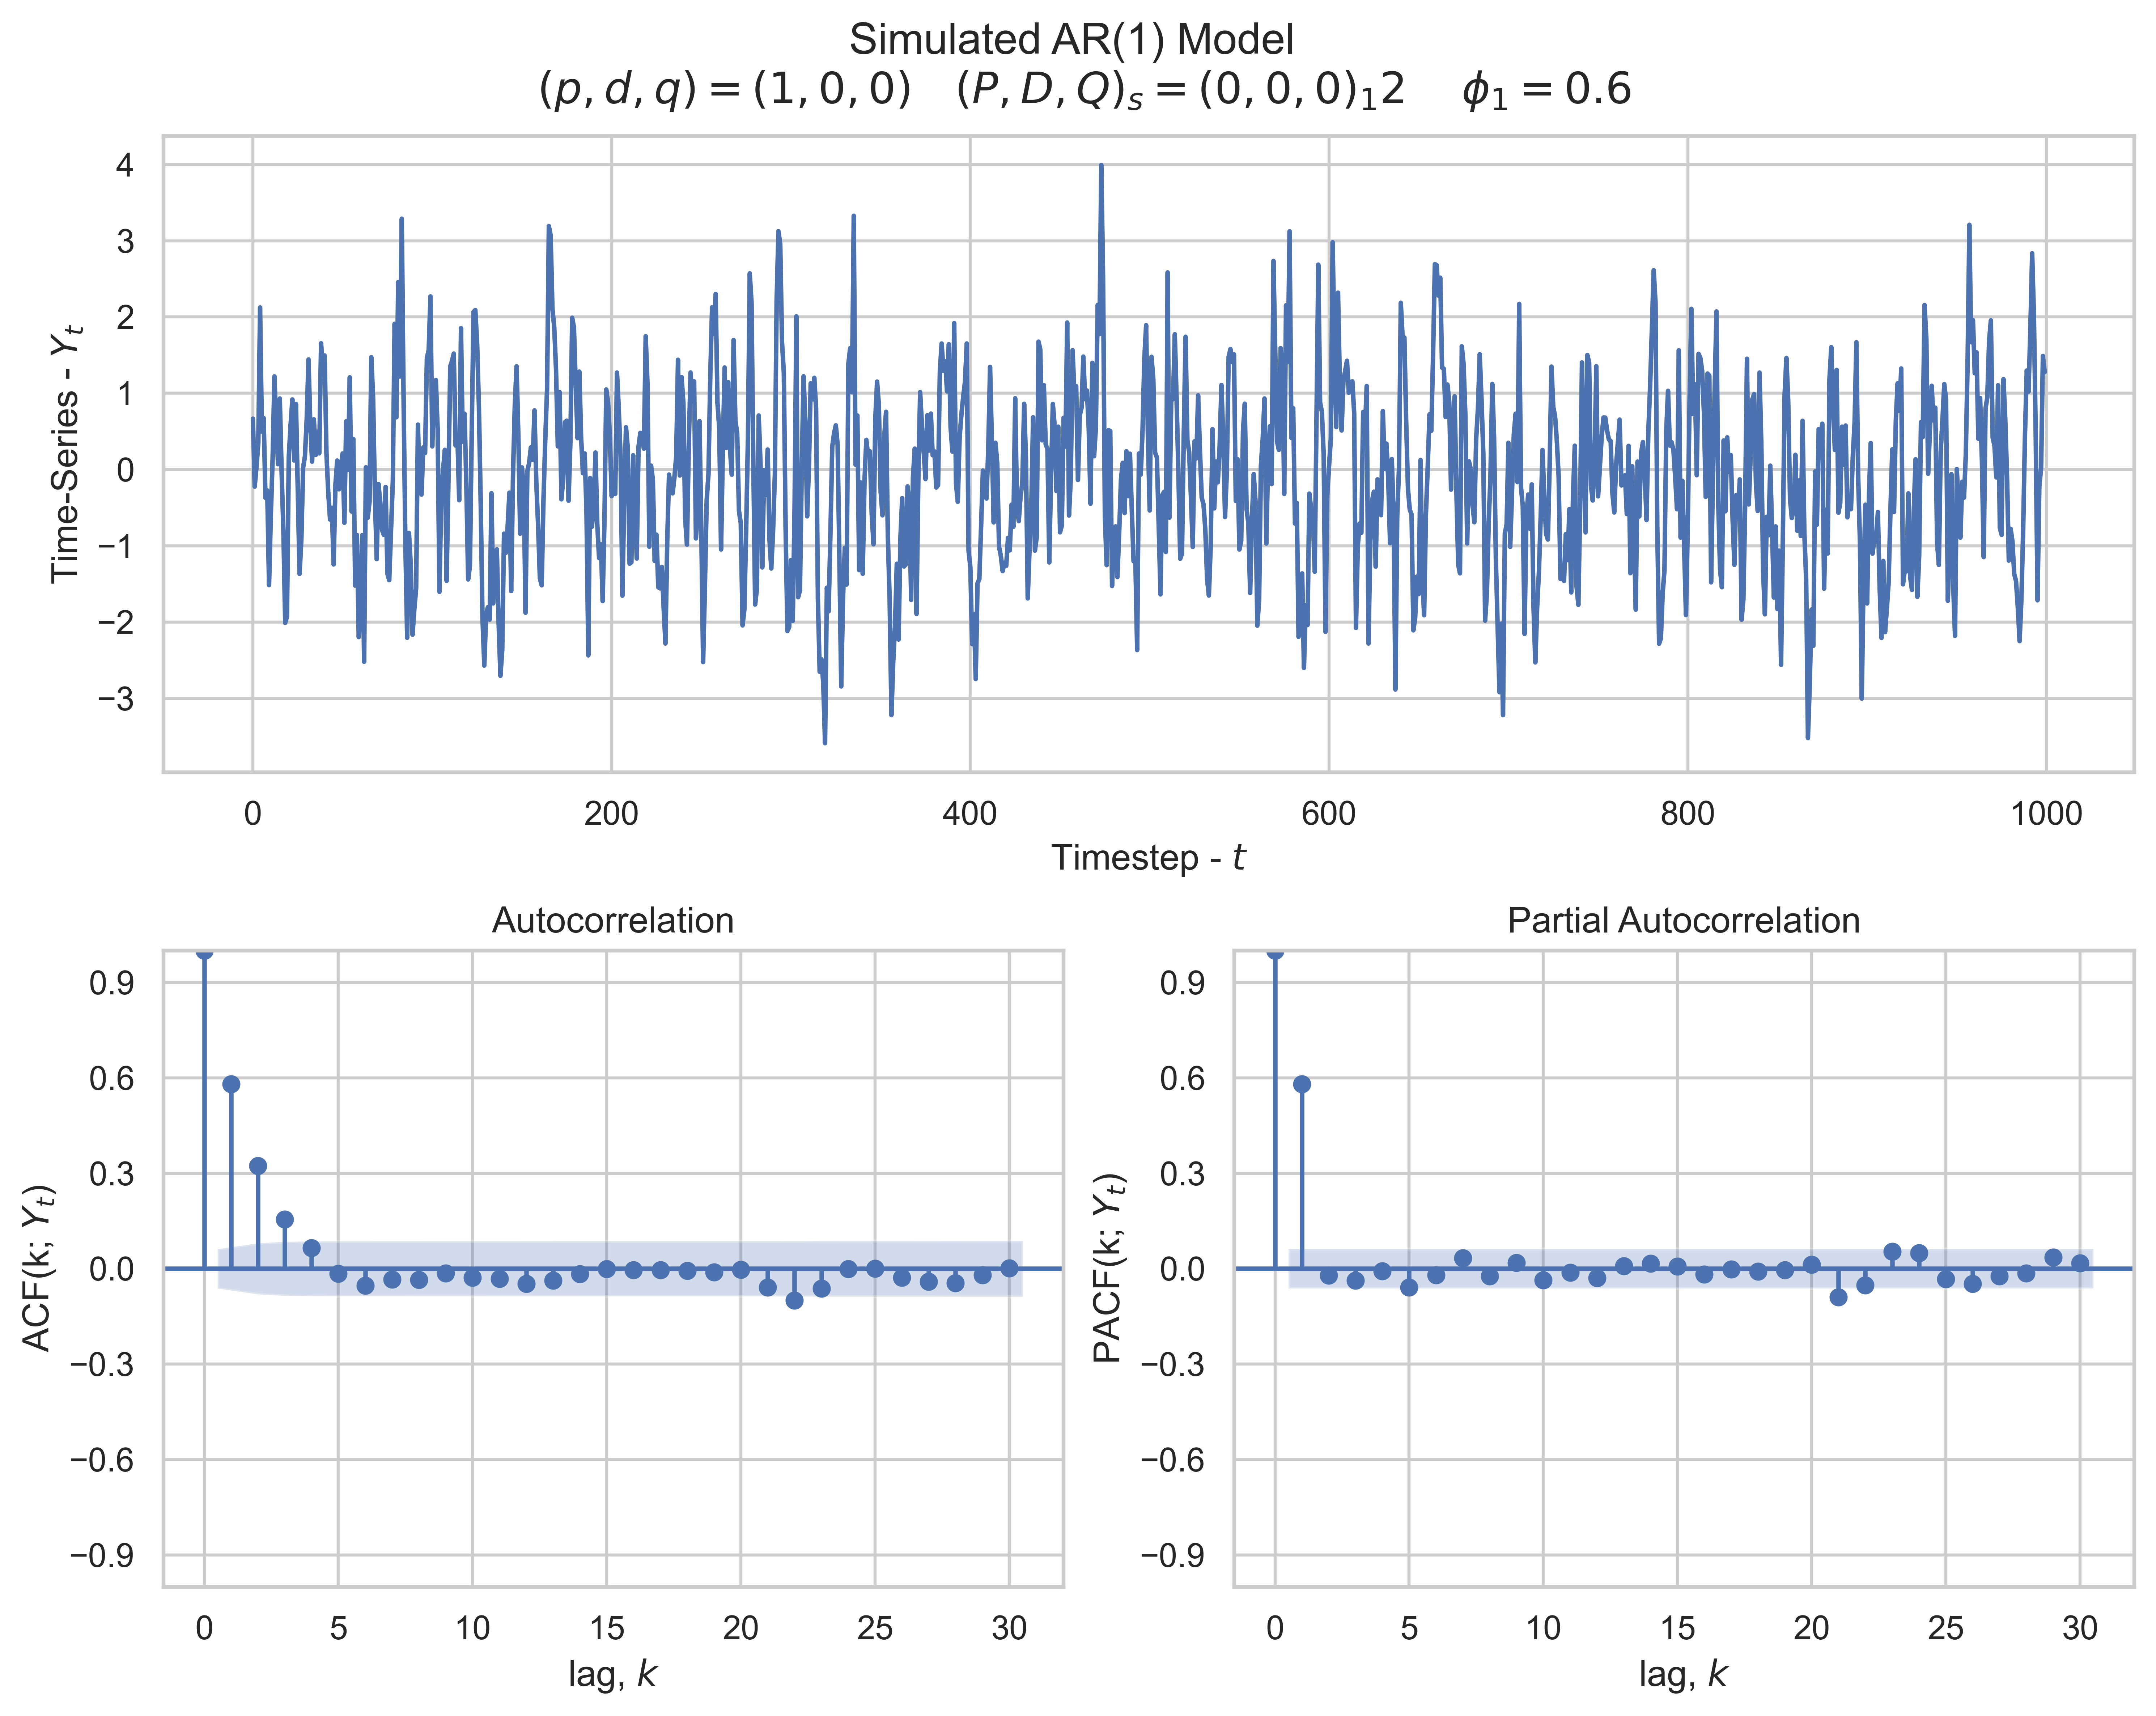

In [139]:
# 2.1
plot_model(((1,0,0), (0,0,0,12)), phis=[0.6])

here 1


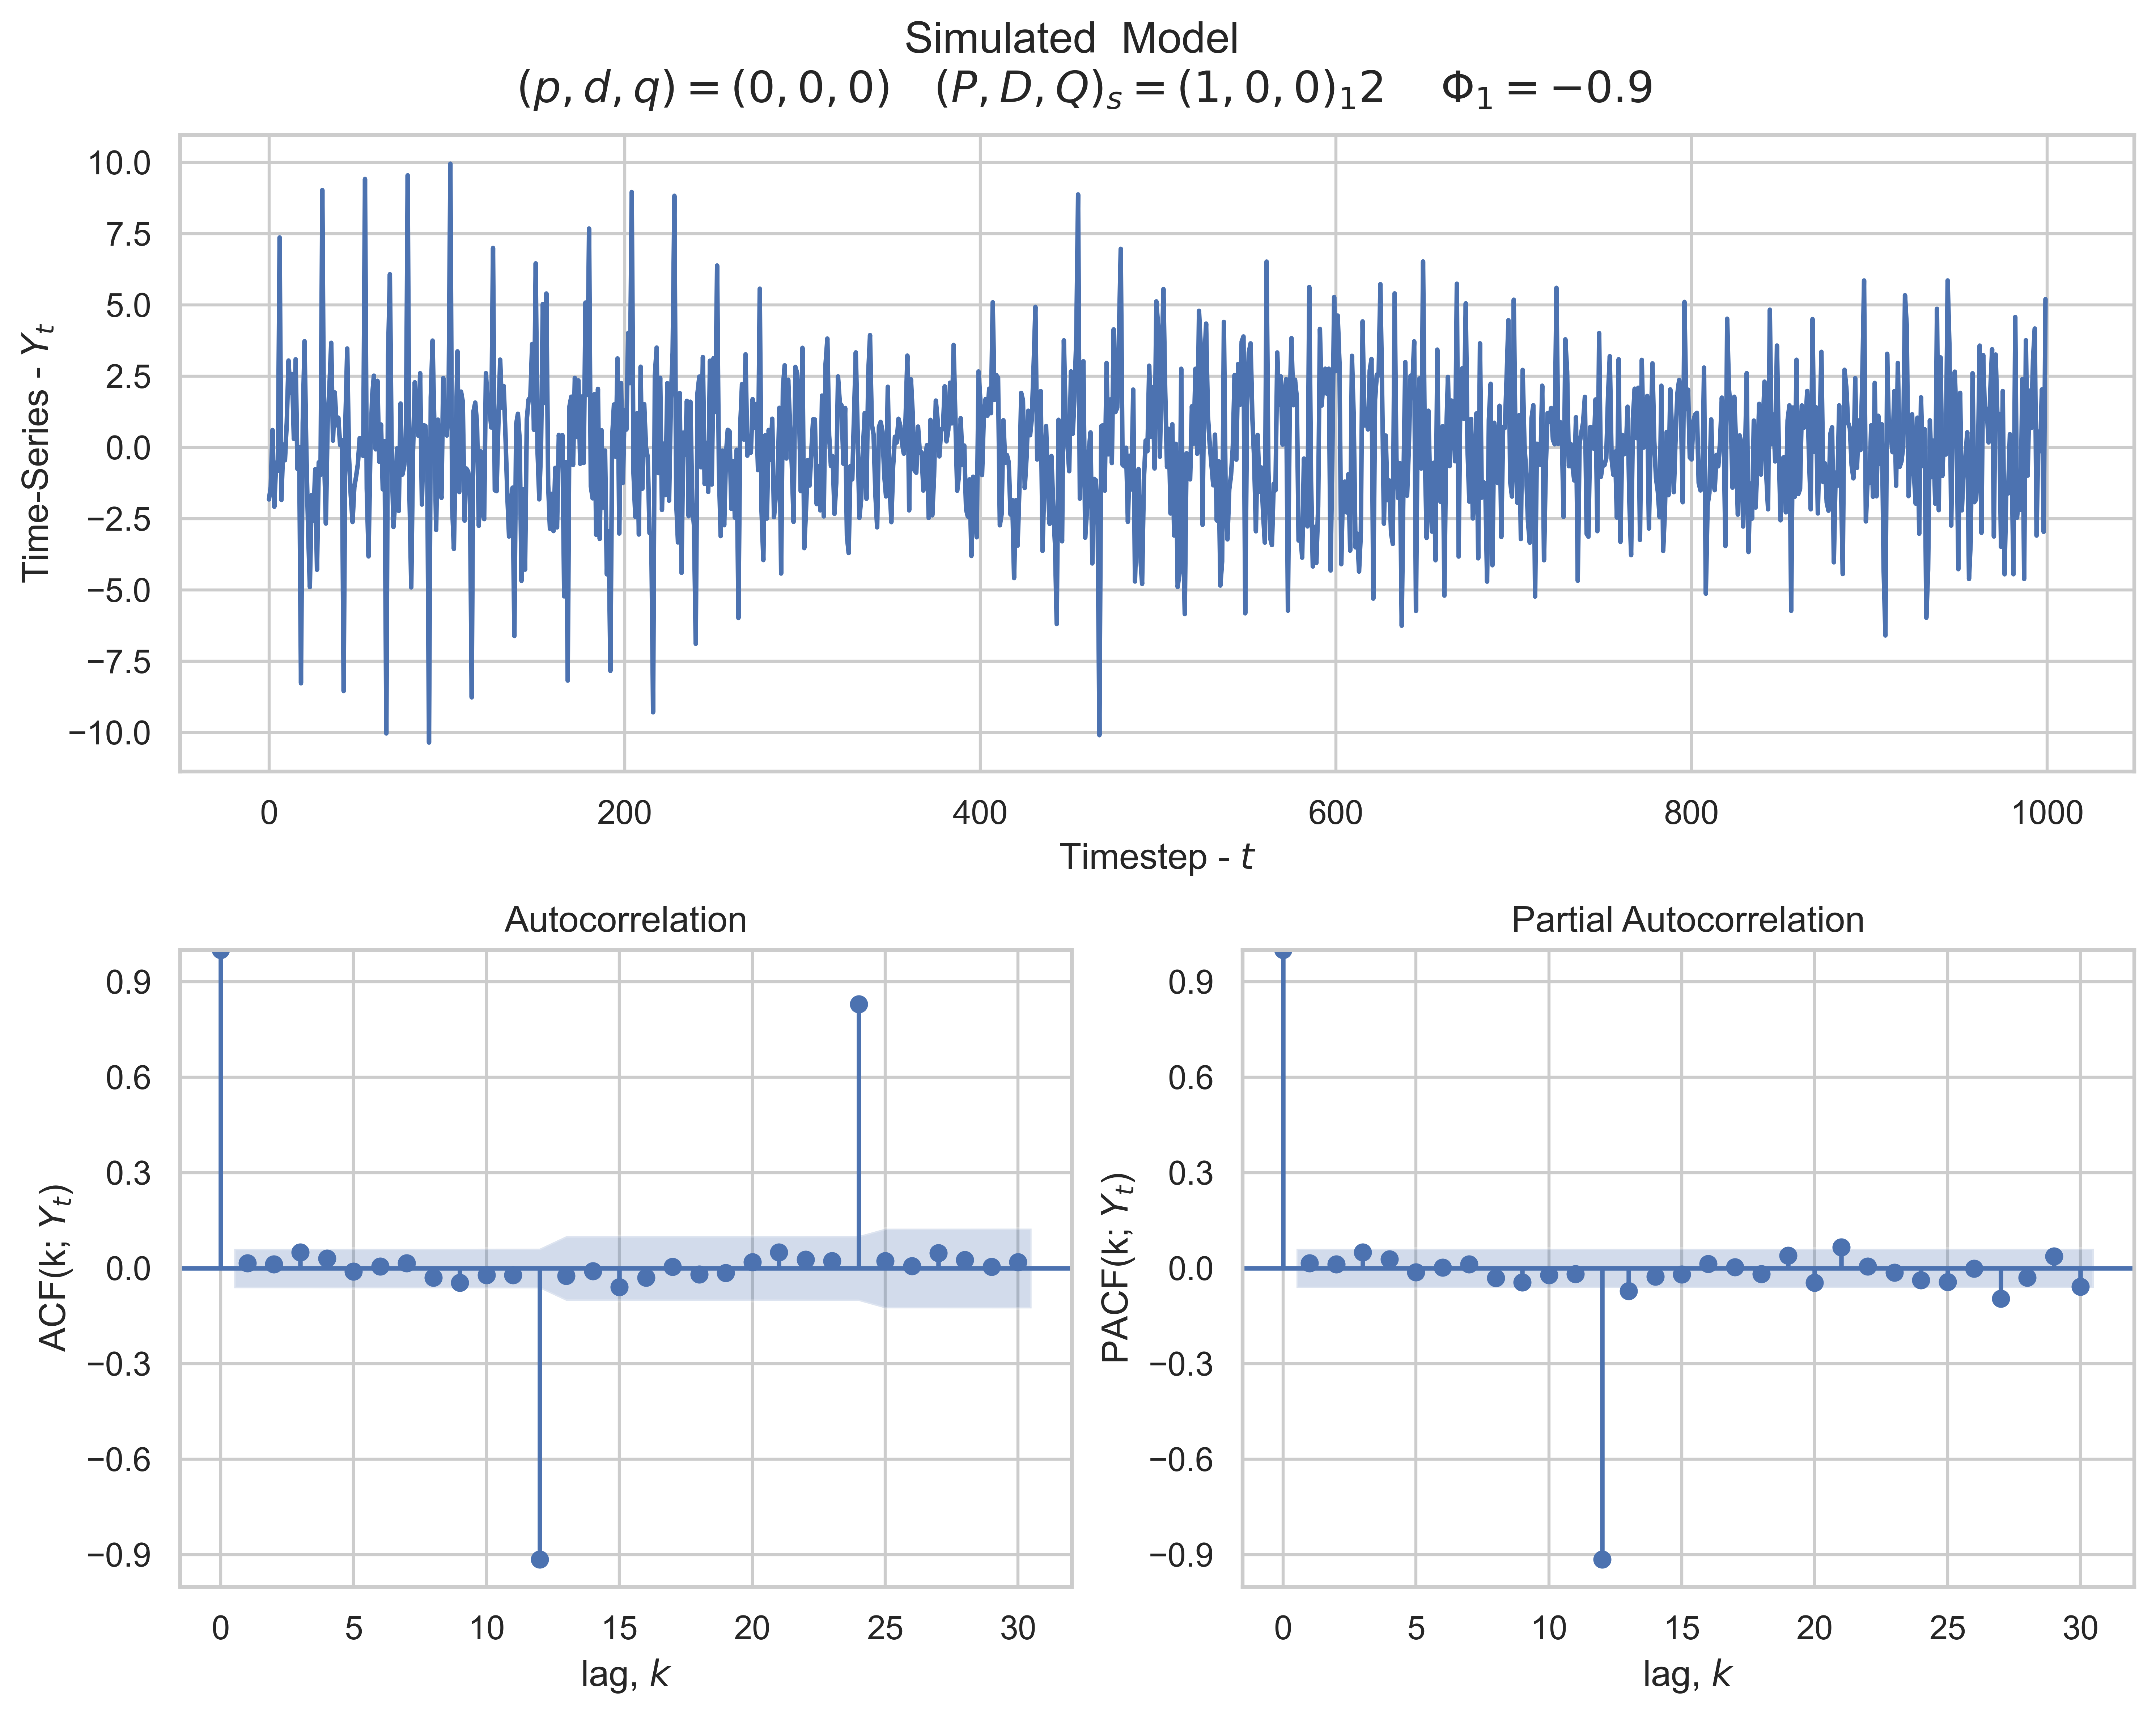

In [140]:
# 2.2
plot_model(((0,0,0), (1,0,0,12)), Phis=[-0.9])

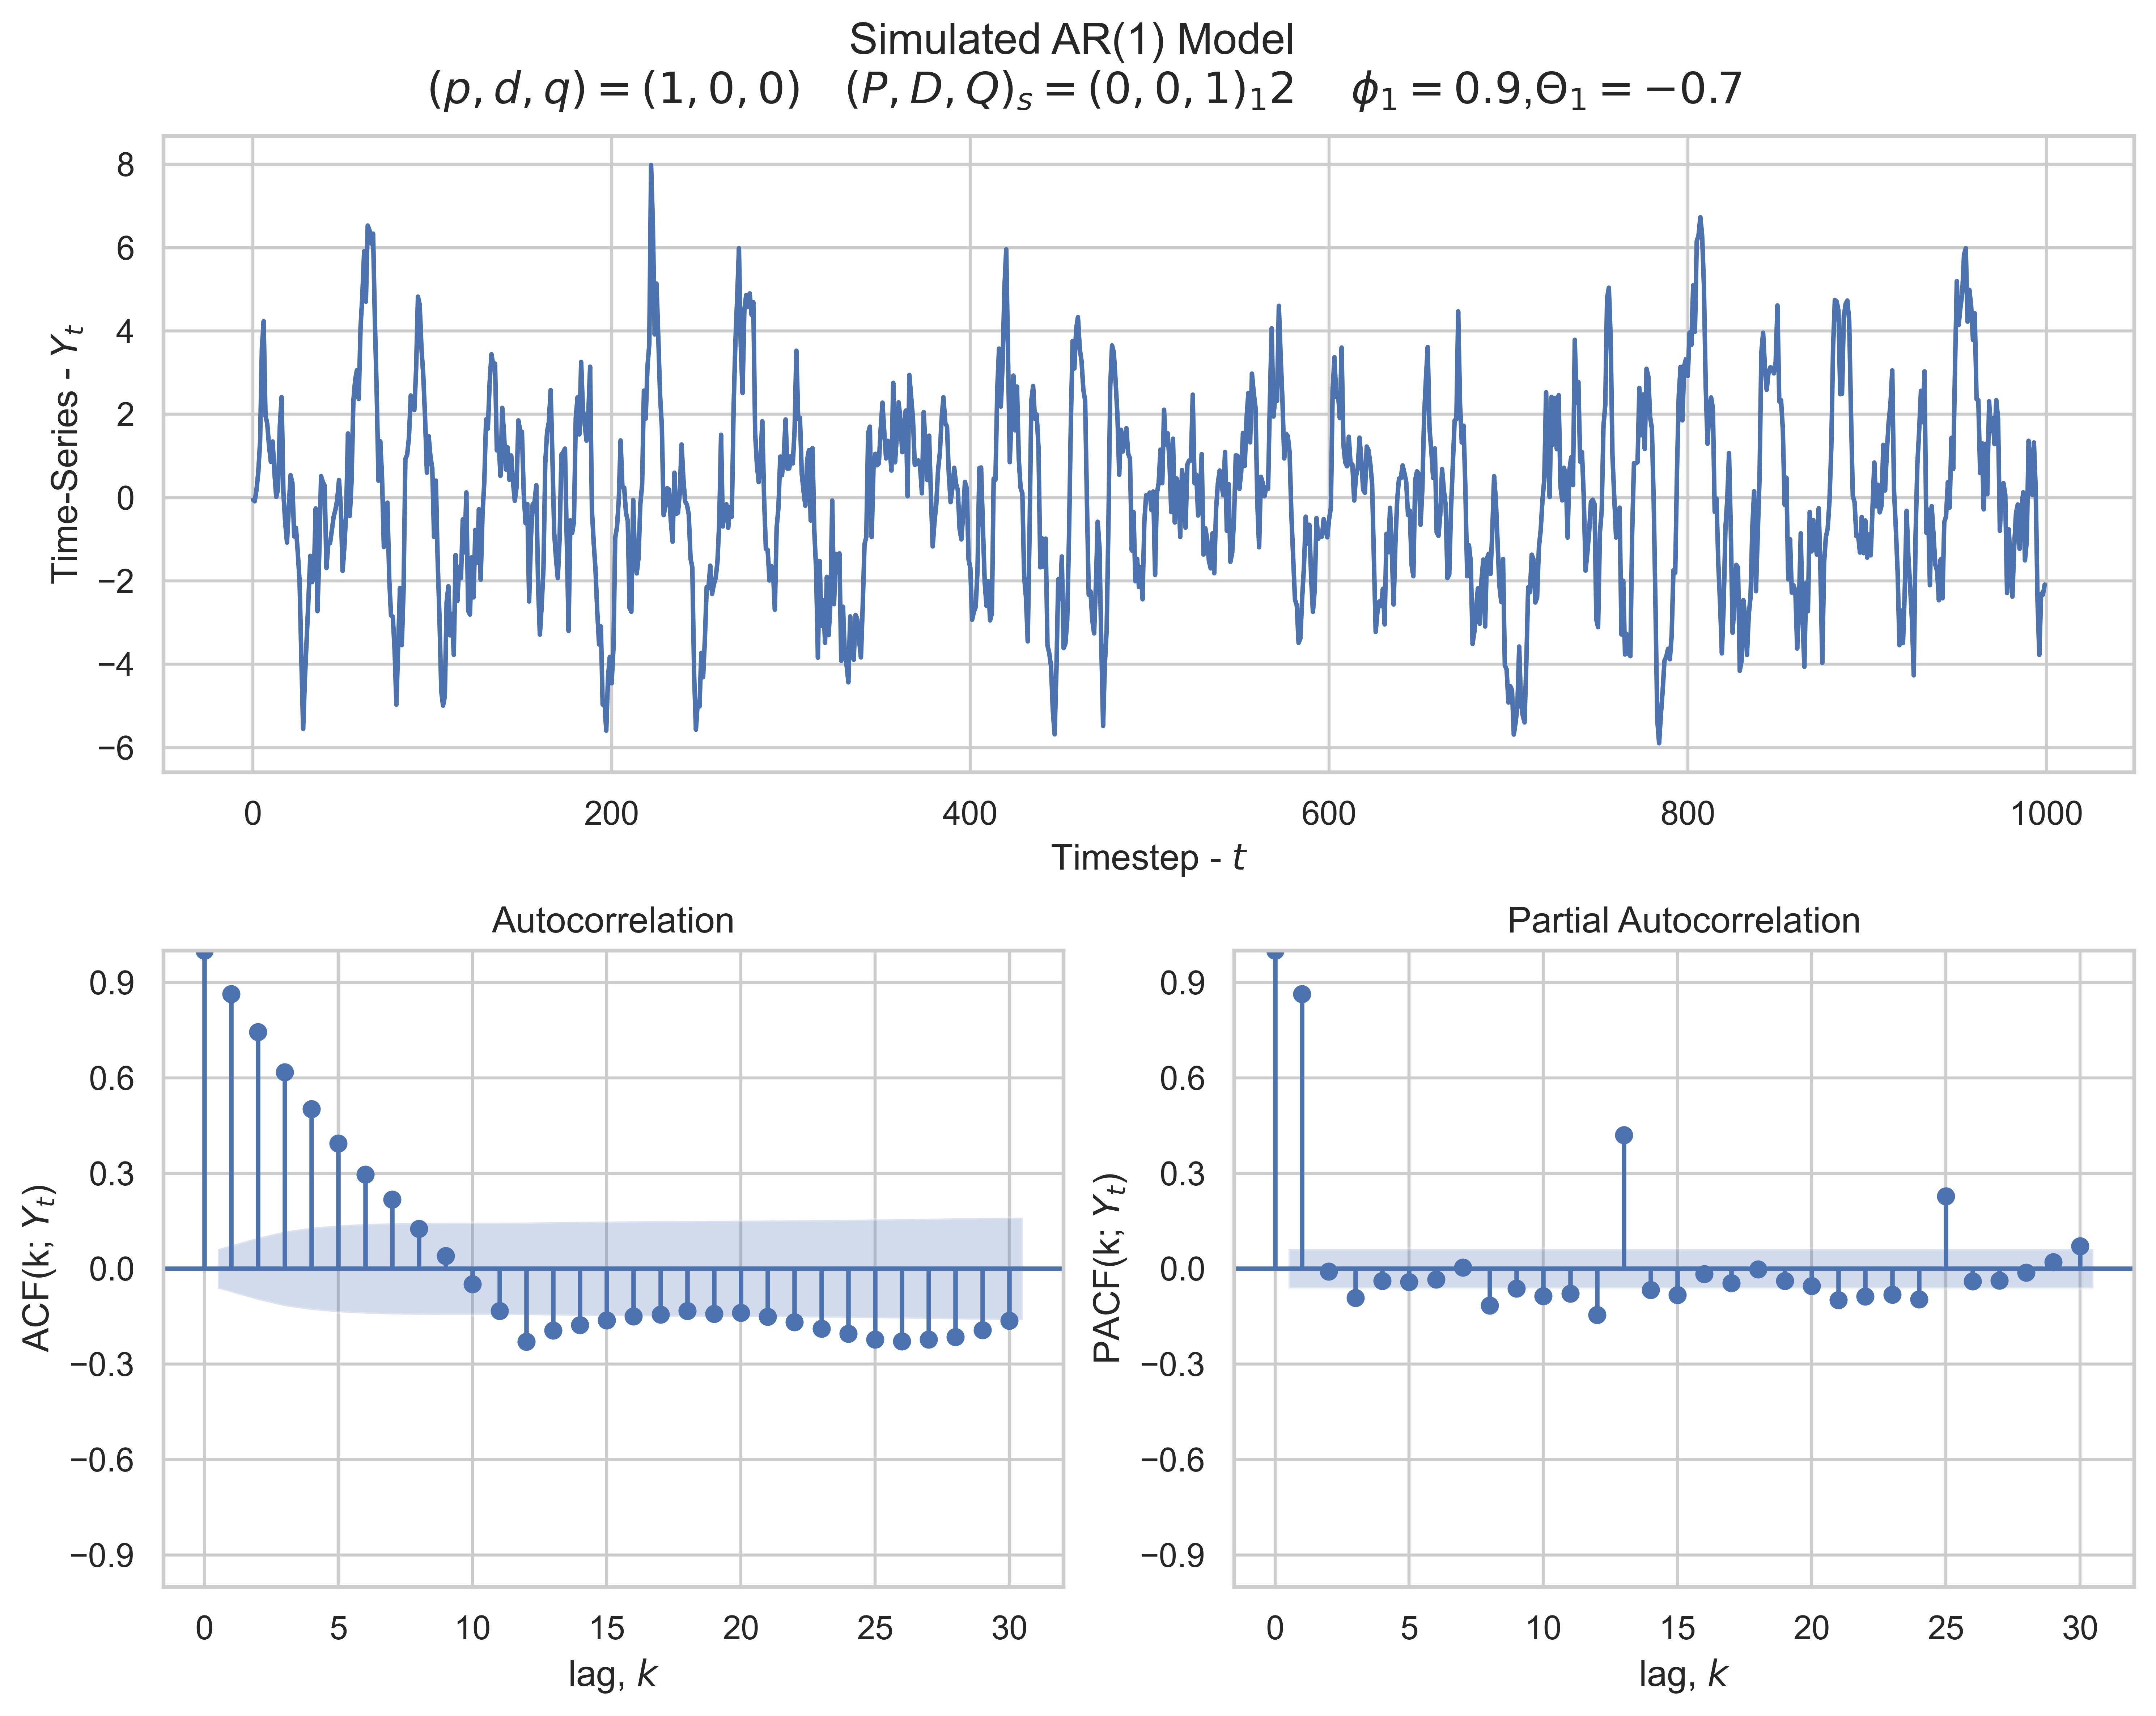

In [141]:
# 2.3
plot_model(((1,0,0), (0,0,1,12)), phis=[0.9], Thetas=[-0.7])

here 1


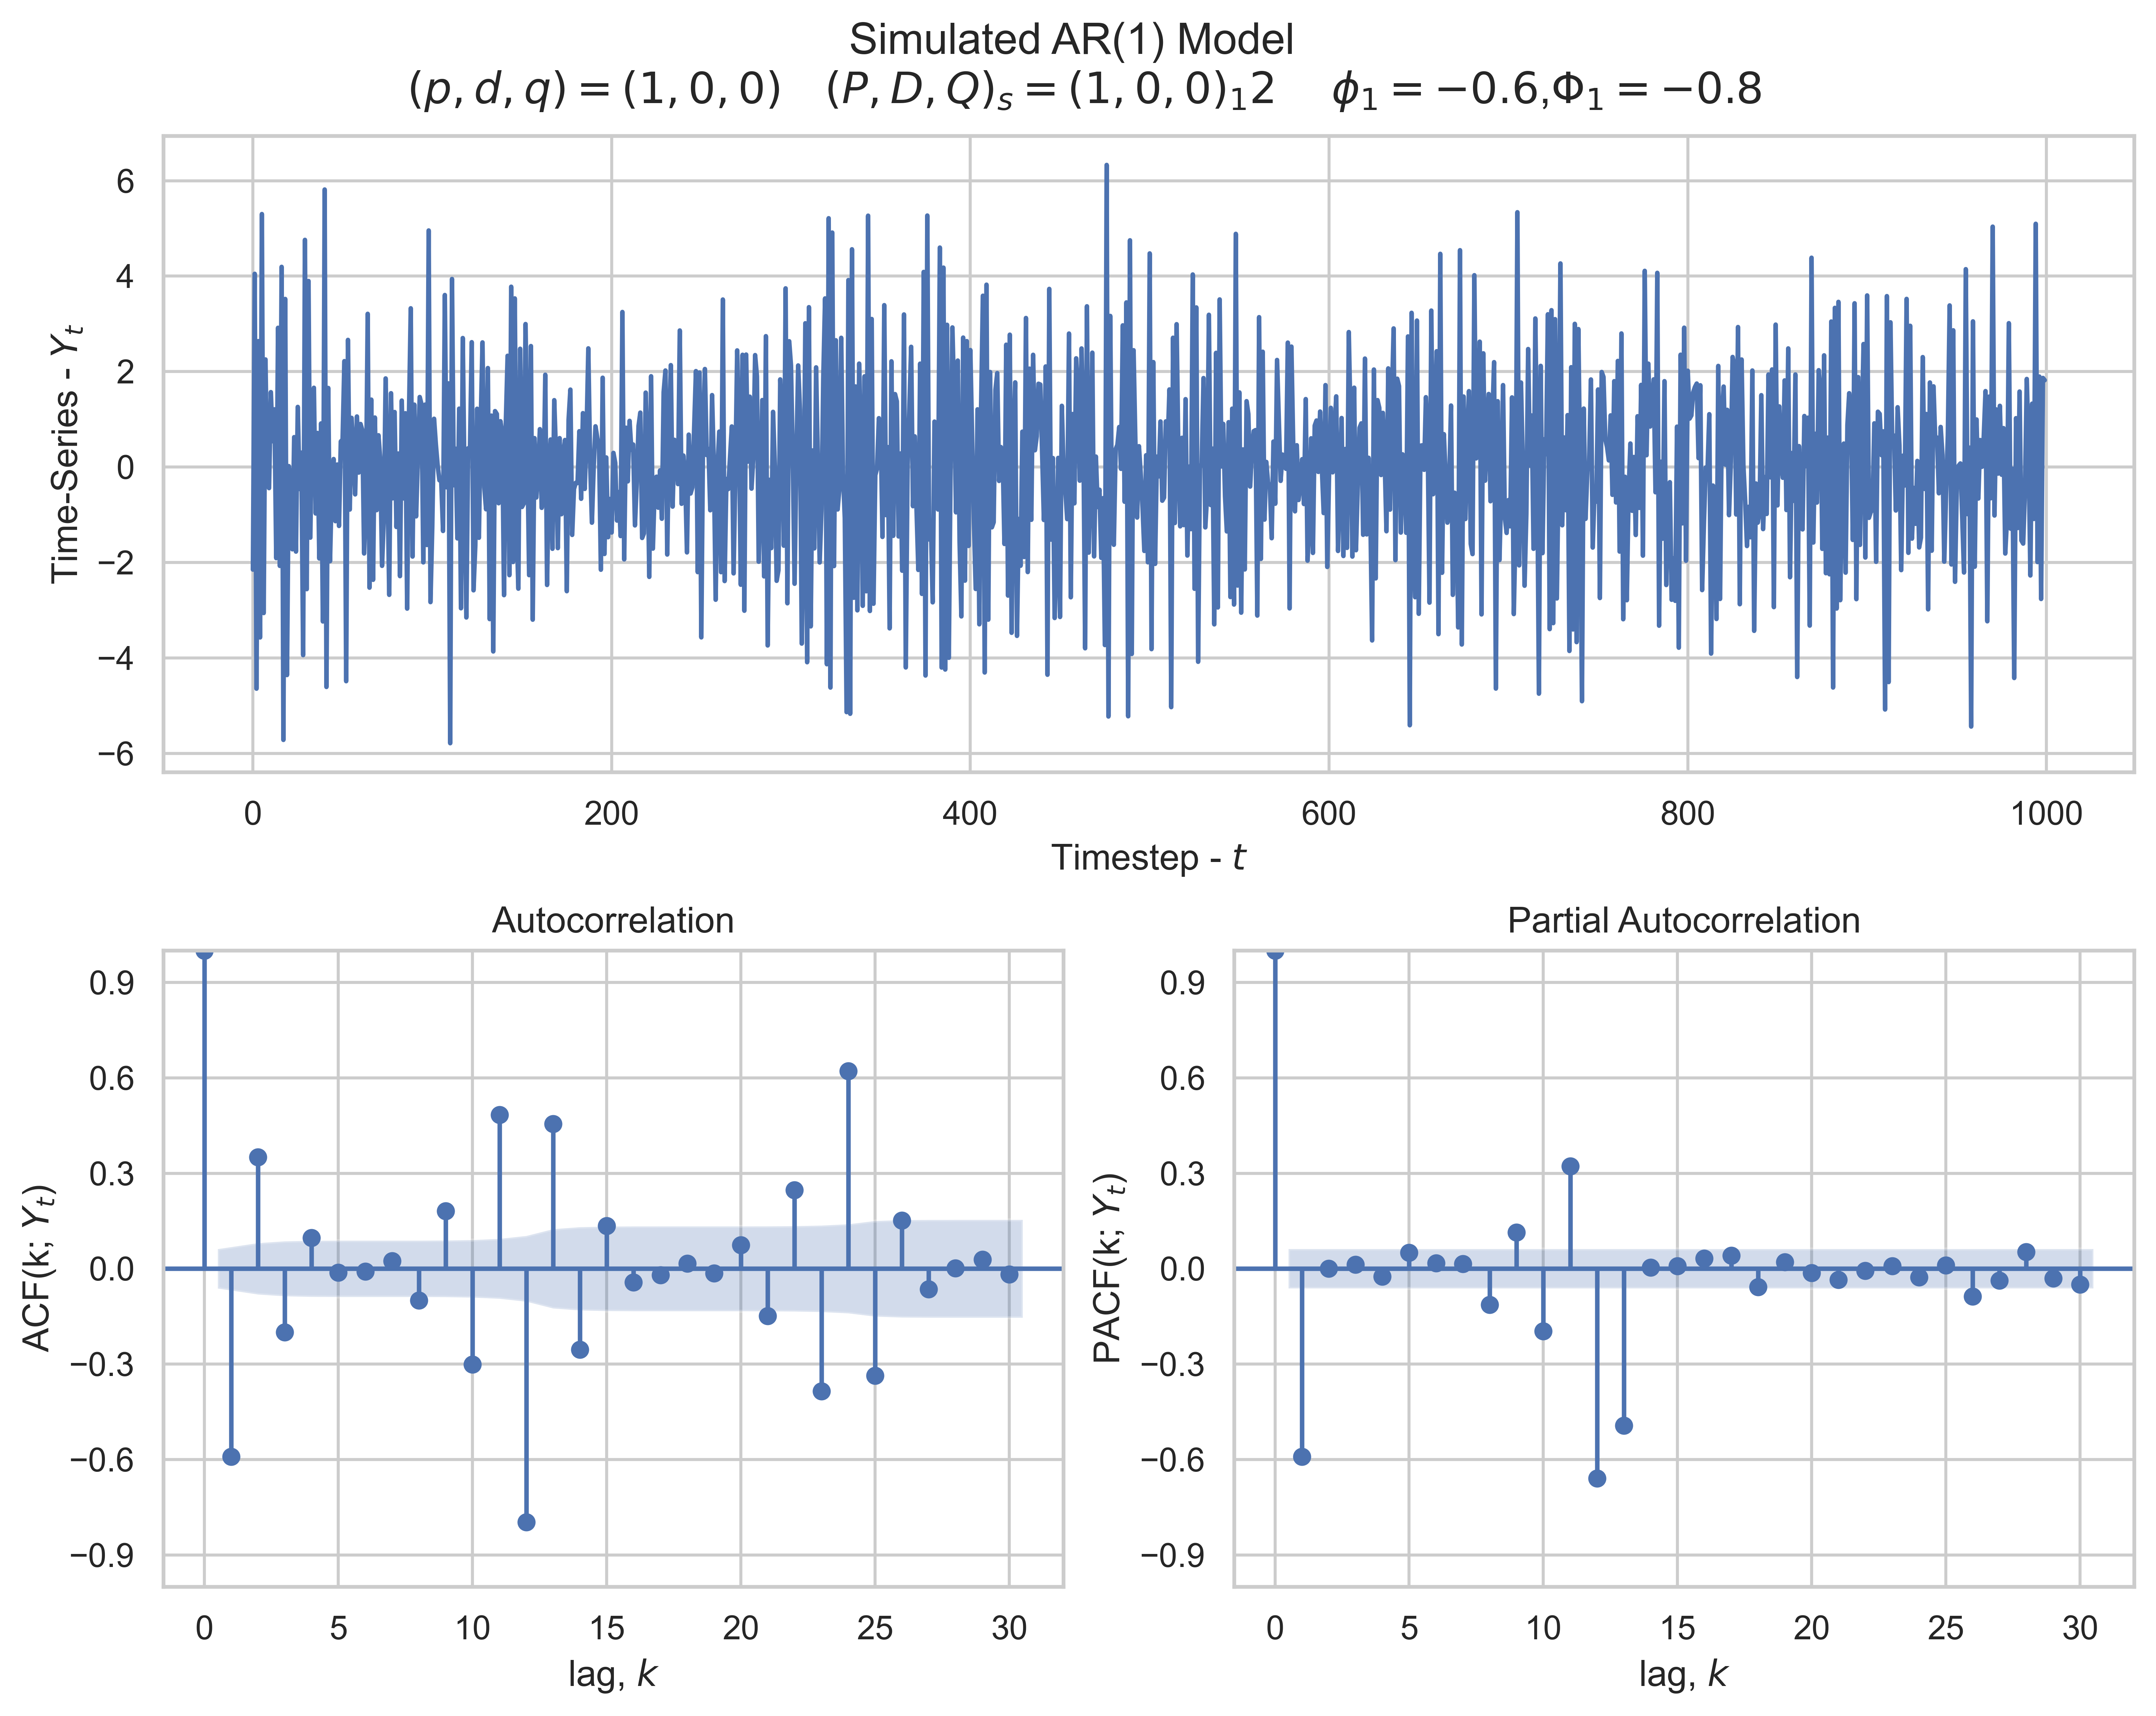

In [142]:
# 2.4
plot_model(((1,0,0), (1,0,0,12)), phis=[-0.6], Phis=[-0.8])

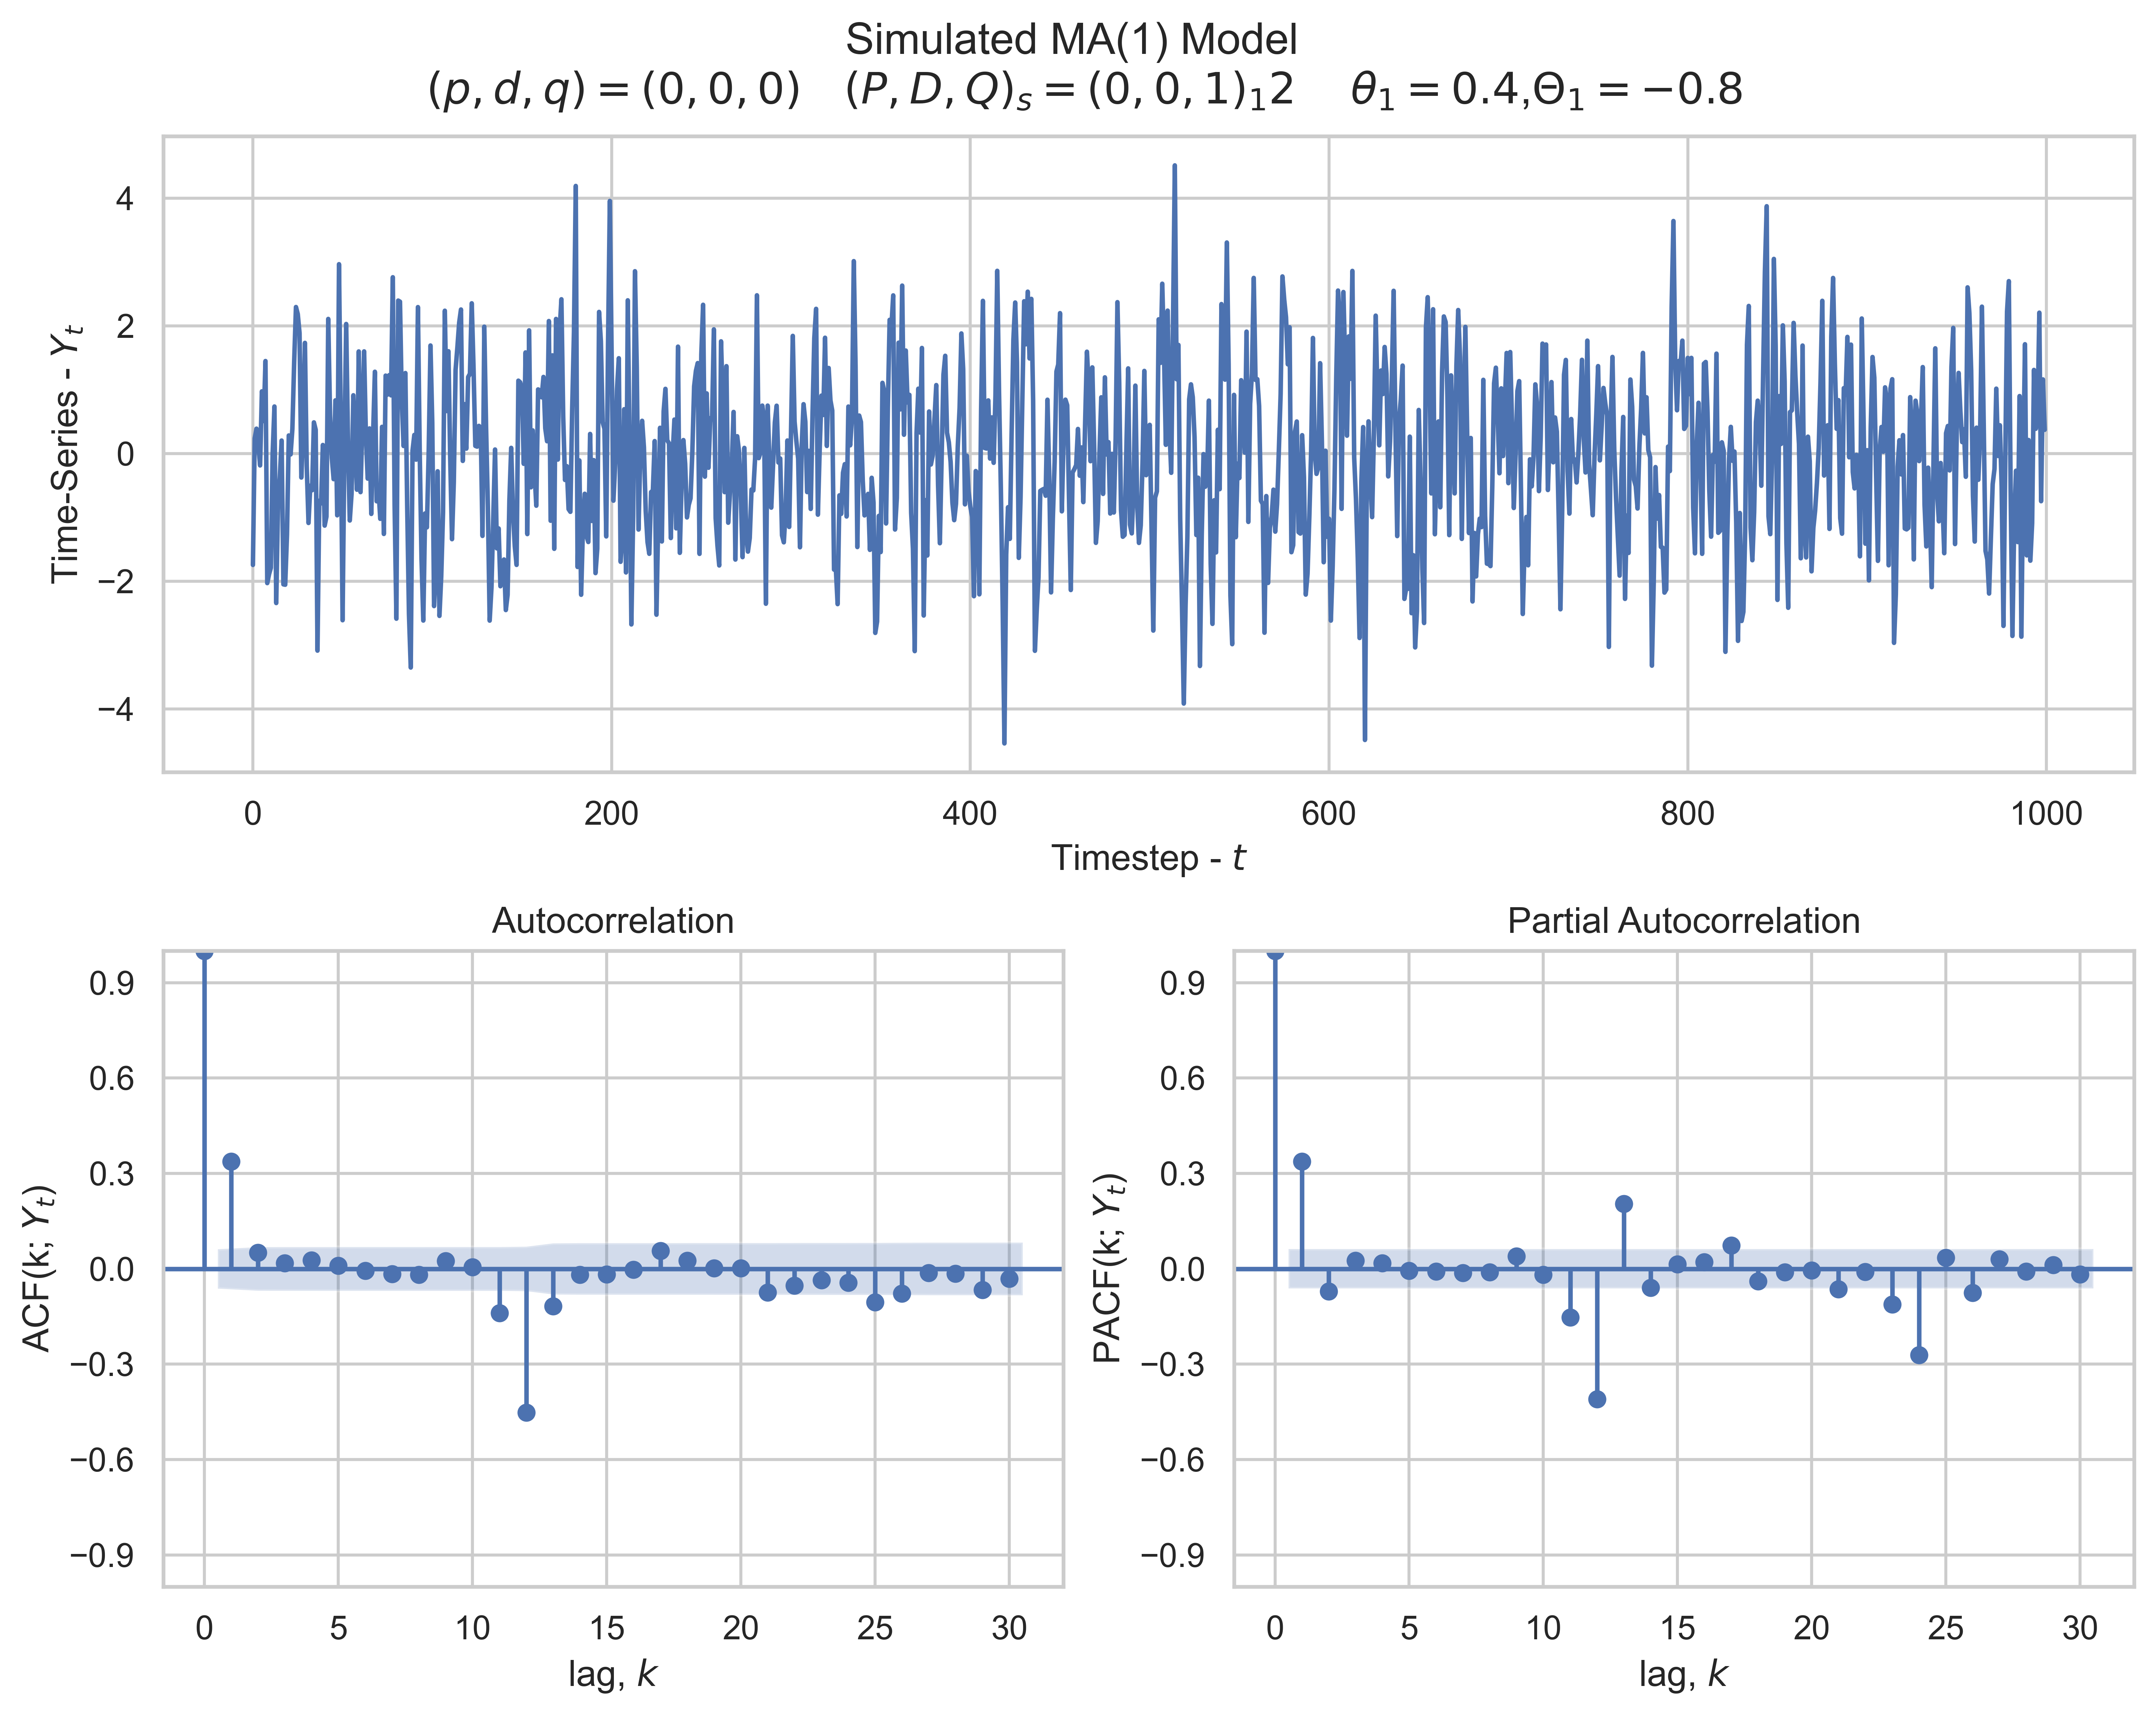

In [143]:
# 2.5
plot_model(((0,0,1), (0,0,1,12)), thetas=[0.4], Thetas=[-0.8])

here 1


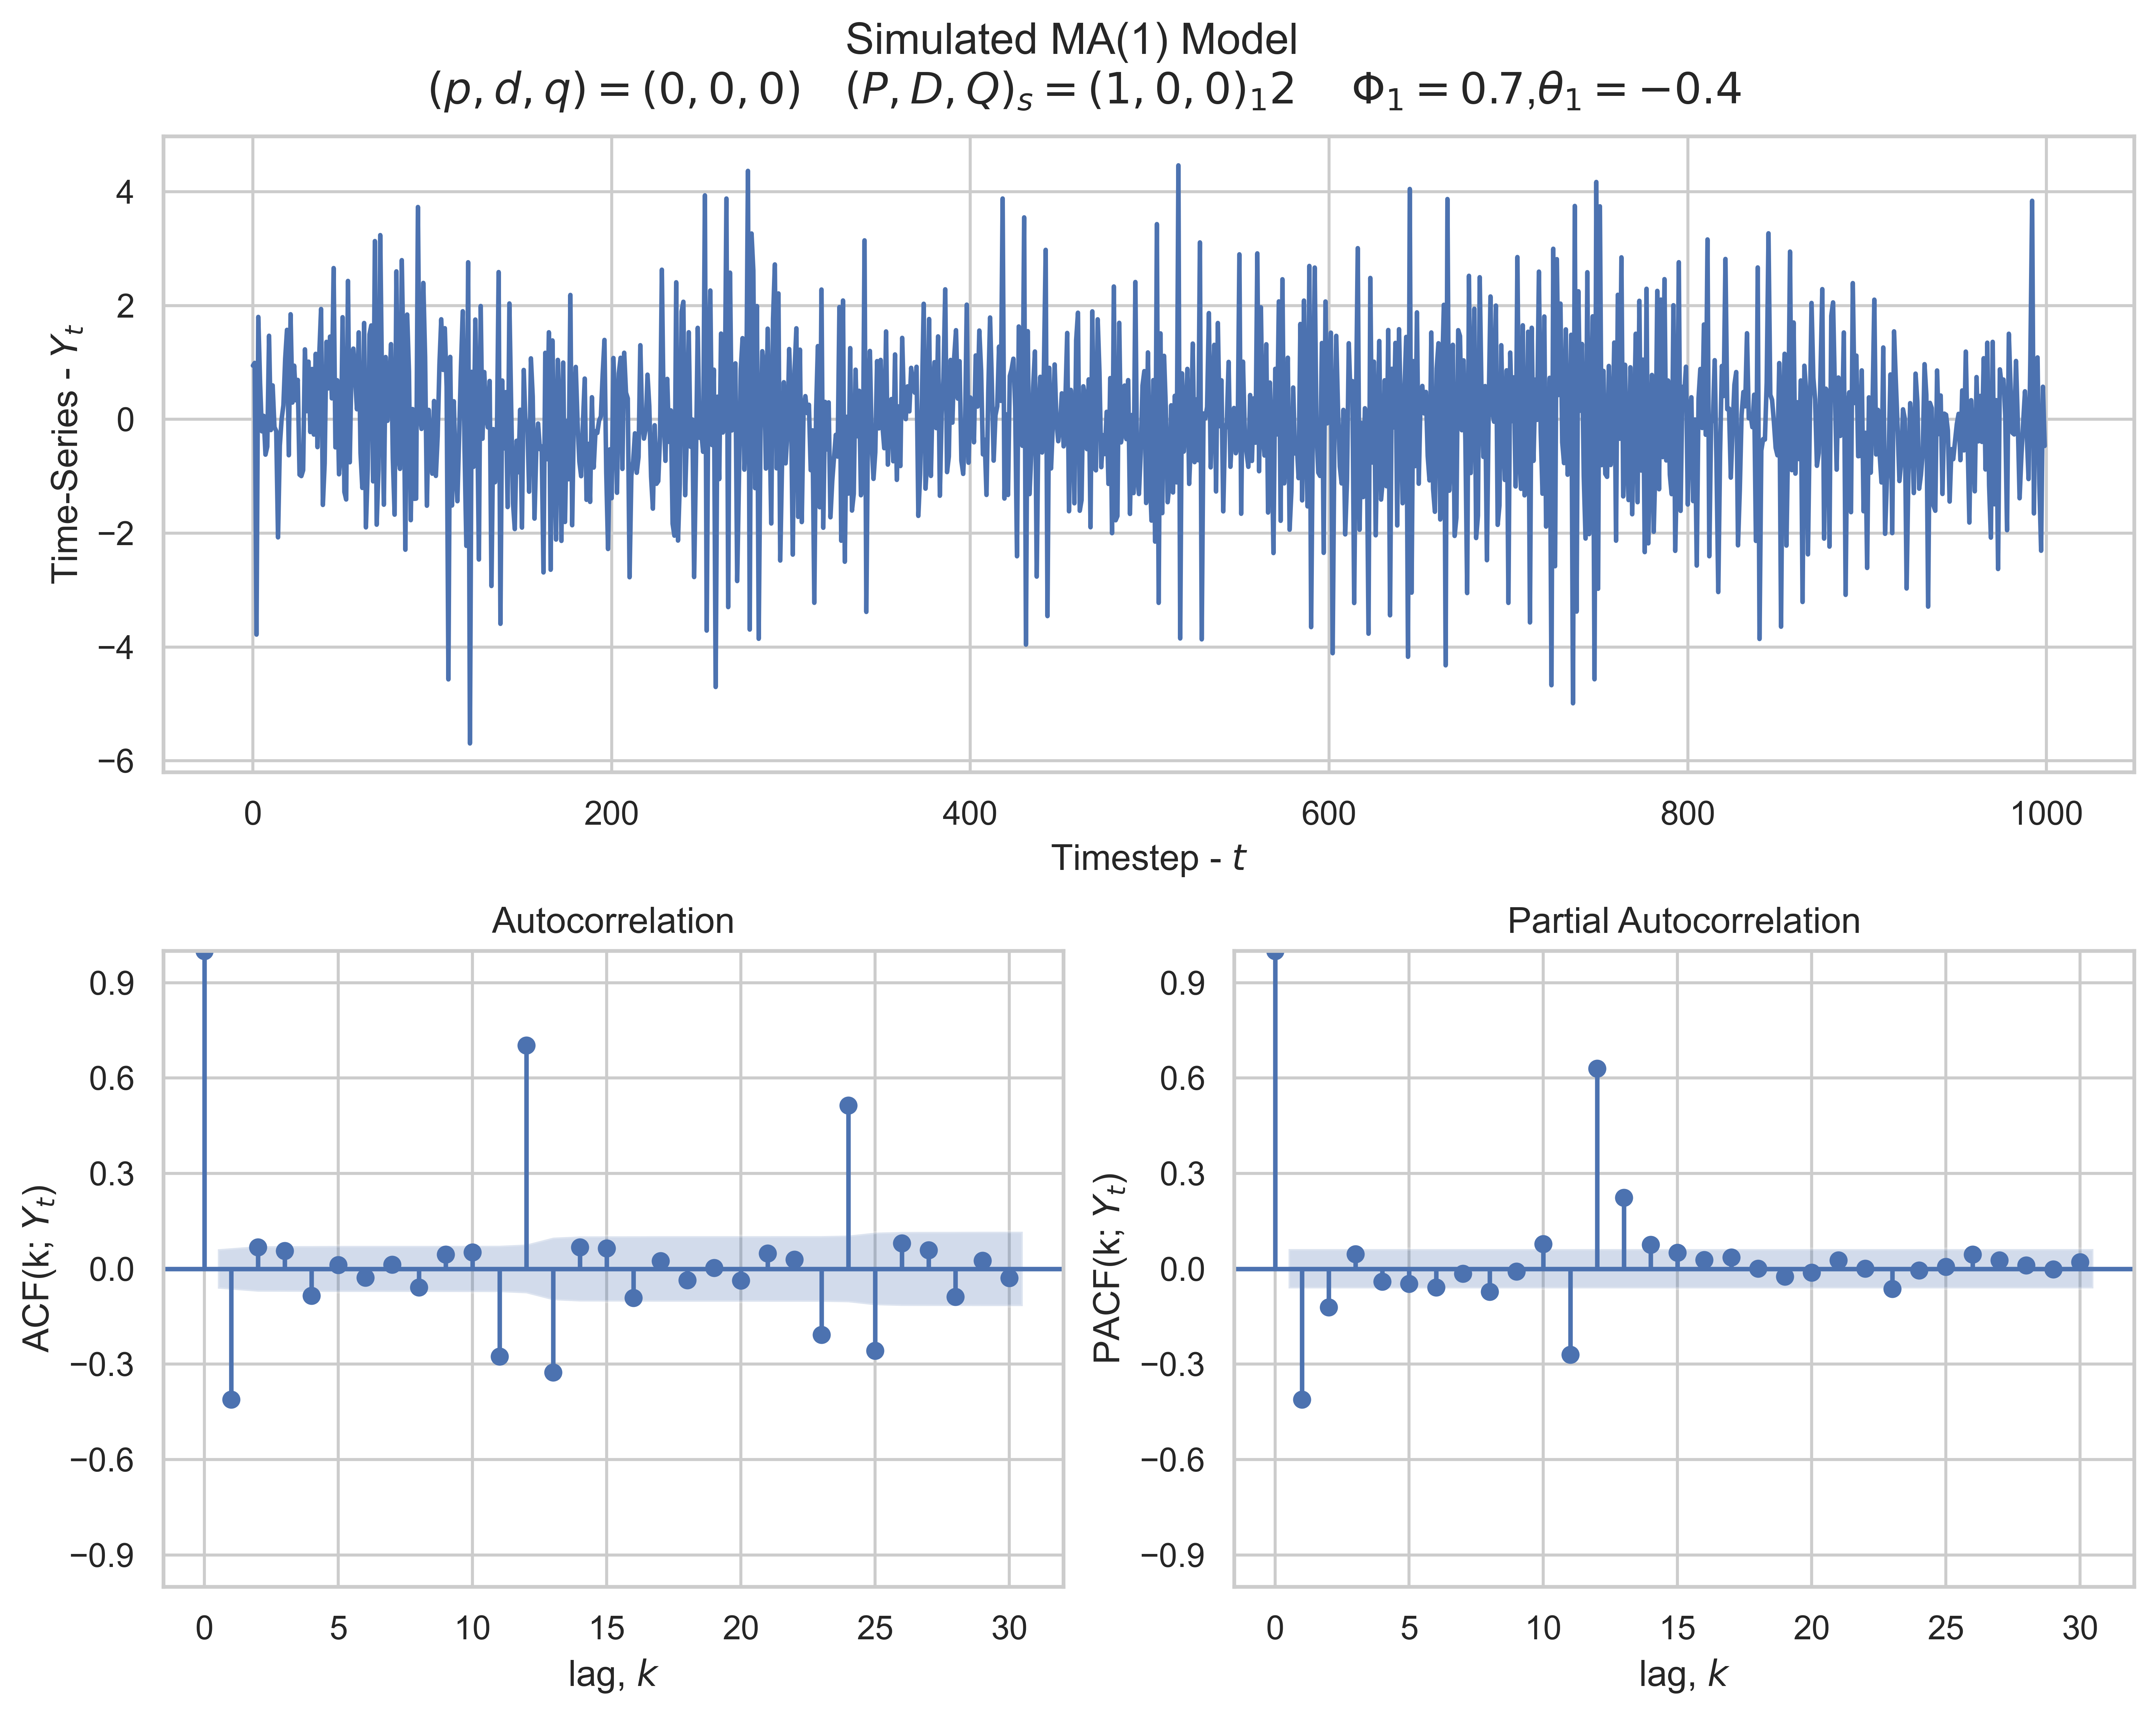

In [144]:
# 2.6
plot_model(((0,0,1), (1,0,0,12)), thetas=[-0.4], Phis=[0.7])

________

### 3 Identifying ARMA models

Below are plots of three simulated ARMA processes: time series plot, ACF and PACF. Guess the ARMA model structure for each of them, and give a short reasoning of your guess.

##### Process 1

![ARMA Process 1](./img/process1.png)

white noise! 
- clearly only correlated to itself
- ACF at 1 for $k=0$ and then ACF(k>0) $\approx$ 0

##### Process 2

![ARMA Process 2](./img/process2.png)

AR(2) model
- exponential dampening in ACF, then close to 0 (below CI boundries)
- PACF above 95%-CI at k=2 and $k \approx 16 \Rightarrow p = 2$
- the upper PACF peak could be random effects 

##### Process 3

![ARMA Process 3](./img/process3.png)

ARMA $(5, 0, 0) \times (0,0,1)_{12}$
- does have both effects
- some kind of seasonality:
    - could also be $s=24$
- AR effects are clearly visible in PACF